<a href="https://colab.research.google.com/github/cheronoF/Data-Science/blob/main/Data_Science_Core_W2_Independent_Project_2021_09_Faith_Rotich_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [320]:
FinancialDataset_df['Avg_householdsize'] = FinancialDataset_df.groupby('country').household_size.transform('mean')
print(FinancialDataset_df)

FinancialDataset_df=FinancialDataset_df.groupby('country')['household_size'].mean()
FinancialDataset_df=FinancialDataset_df.reset_index()
FinancialDataset_df

    country  household_size  Avg_householdsize
0     Kenya        3.874808           3.874808
1    Rwanda        4.431611           4.431611
2  Tanzania        1.924340           1.924340
3    Uganda        4.436231           4.436231


In [408]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [409]:
# Loading the Data from the source i.e. csv

# Dataset url = http://bit.ly/FinancialDataset

# Viewing the dataset

Financial_df = pd.read_csv("http://bit.ly/FinancialDataset")
Financial_df

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [410]:
Financial_df.loc[0]

country                                     Kenya
year                                         2018
uniqueid                               uniqueid_1
Has a Bank account                            Yes
Type of Location                            Rural
Cell Phone Access                             Yes
household_size                                  3
Respondent Age                                 24
gender_of_respondent                       Female
The relathip with head                     Spouse
marital_status            Married/Living together
Level of Educuation           Secondary education
Type of Job                         Self employed
Name: 0, dtype: object

### Checking the data

In [376]:
# Determining the number of records in the dataset

Financial_df.shape

(23524, 13)

In [411]:
# Checking the head of the dataset

Financial_df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [412]:
# Checking the tail of the dataset

Financial_df.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [413]:
# Checking whether each column has an appropriate datatype

Financial_df.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

External Data Source Validation
Making sure the data matches something outside of the dataset because this ensures that the measurements are roughly in line with what they should be.  

Based on other Findata sources, the data we have is valid

### Tidyng the Dataset

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


AttributeError: ignored

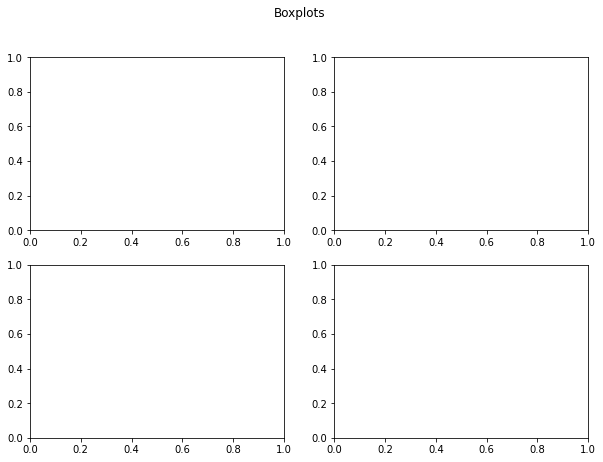

In [414]:
# Checking for Outliers
#


fig, ((ax7, ax8)) = plt.subplots(2,2, figsize=(10, 7))
fig.suptitle('Boxplots')

sns.boxplot(Financial_df['household_size'], ax=ax7)
sns.boxplot(Financial_df['Respondent Age'], ax=ax8)

plt.show()


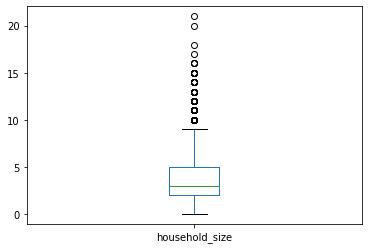

In [415]:
Financial_df.boxplot(column =['household_size'], grid = False)

In [416]:
Financial_df.columns

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

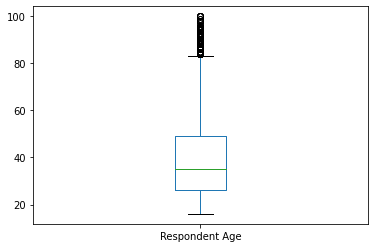

In [417]:
Financial_df.boxplot(column =['Respondent Age'], grid = False)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


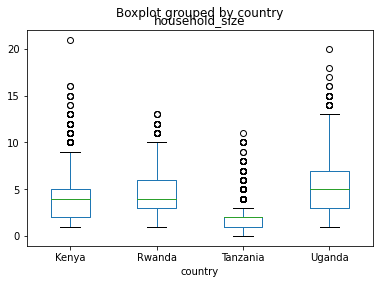

In [418]:
#Household size Outliers by country

Financial_df.boxplot(column =['household_size'], by ='country', grid = False)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


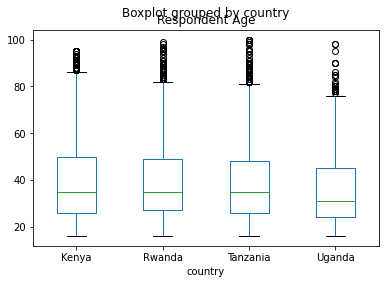

In [419]:
# Respondent age Outliers by country

Financial_df.boxplot(column =['Respondent Age'], by ='country', grid = False)

In [420]:
# Checking for Anomalies
Q1 = Financial_df.quantile(0.25)
Q3 = Financial_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

year               2.0
household_size     3.0
Respondent Age    23.0
dtype: float64


In [421]:
# Dealing with outliers
# Removing outliers based on the IQR range and stores the result in the data frame 'df_out'

Financial_df_out = Financial_df[~((Financial_df < (Q1 - 1.5 * IQR)) | (Financial_df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Printing the shape of the new dataset

print(Financial_df_out.shape)

# Printing the shape of the old dataset

print(Financial_df.shape)

(22903, 13)
(23524, 13)


In [422]:
Financial_df_out.shape

(22903, 13)

In [423]:
Financial_df_out.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [424]:
FinancialDataset_df = Financial_df_out
FinancialDataset_df.head(2)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent


In [425]:
# Identifying the Missing Data

FinancialDataset_df.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            27
Respondent Age            33
gender_of_respondent      33
The relathip with head     4
marital_status            31
Level of Educuation       29
Type of Job               30
dtype: int64

In [426]:
# Dropping null values

FinancialDataset_df.dropna

<bound method DataFrame.dropna of       country  year  ...              Level of Educuation                Type of Job
0       Kenya  2018  ...              Secondary education              Self employed
1       Kenya  2018  ...              No formal education       Government Dependent
2       Kenya  2018  ...  Vocational/Specialised training              Self employed
3       Kenya  2018  ...                Primary education  Formally employed Private
4       Kenya  2018  ...                Primary education        Informally employed
...       ...   ...  ...                              ...                        ...
23518  Uganda  2018  ...                Primary education                  No Income
23519  Uganda  2018  ...              No formal education               Other Income
23520  Uganda  2018  ...              Secondary education               Other Income
23521  Uganda  2018  ...                Primary education               Other Income
23522  Uganda  2018  ...       

In [427]:
# More data cleaning procedures

FinancialDataset_df.duplicated().values.any()

False

In [428]:
FinancialDataset_df.columns

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

In [429]:
# Dropping columns we may not need

FinancialDataset_df.drop(['uniqueid', 'The relathip with head'], axis = 1)

,country,year,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...
23518,Uganda,2018,No,Rural,Yes,NaN,20.0,Female,Single/Never Married,Primary education,No Income
23519,Uganda,2018,No,Rural,Yes,4.0,48.0,Female,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,No,Rural,Yes,2.0,27.0,Female,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,No,Rural,Yes,5.0,27.0,Female,Widowed,Primary education,Other Income


In [ ]:
#Grouping and perform count over each group

FinancialDataset_df =  FinancialDataset_df.groupby('country')['country'].count()
print(FinancialDataset_df)

# Rwanda provides the highest number of entries while Uganda provides the least

country
Kenya       5871
Rwanda      8562
Tanzania    6529
Uganda      1927
Name: country, dtype: int64

### Univariate Analysis

Household size

In [431]:
# Mean household size
FinancialDataset_df["household_size"].mean()

3.573395698548697

In [432]:
# Median household size

FinancialDataset_df["household_size"].median()

3.0

In [433]:
# Mode

FinancialDataset_df["household_size"].mode()

0    2.0
dtype: float64

In [434]:
# Standard Deviation 
FinancialDataset_df["household_size"].std()

2.07978318144993

In [435]:
# Variance
FinancialDataset_df["household_size"].var()

4.325498081841992

In [436]:
# Skewness
FinancialDataset_df["household_size"].skew()

0.6107328357162268

In [437]:
# Kurtosis
FinancialDataset_df["household_size"].kurt()

-0.49930440433763623

In [438]:
# Quantile
FinancialDataset_df["household_size"].quantile([0.25,0.5,0.75])

0.25    2.0
0.50    3.0
0.75    5.0
Name: household_size, dtype: float64

In [439]:
FinancialDataset_df.columns

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

Respondent Age

In [440]:
# Mean
FinancialDataset_df["Respondent Age"].mean()

38.34508089199825

In [441]:
# Median
FinancialDataset_df["Respondent Age"].median()

35.0

In [442]:
# Mode
FinancialDataset_df["Respondent Age"].mode()

0    30.0
dtype: float64

In [443]:
# Standrad Deviation
FinancialDataset_df["Respondent Age"].std()

15.804022763001404

In [444]:
# Skewness
FinancialDataset_df["Respondent Age"].skew()

0.7409754960713362

In [445]:
# Kurtosis
FinancialDataset_df["Respondent Age"].kurt()

-0.23634544791914935

In [446]:
# Quantile
FinancialDataset_df["Respondent Age"].quantile([0.25,0.5,0.75])

0.25    26.0
0.50    35.0
0.75    48.0
Name: Respondent Age, dtype: float64

Univariate Analysis Visualization

('Respondent Ages per country', 'Age', 'Country')

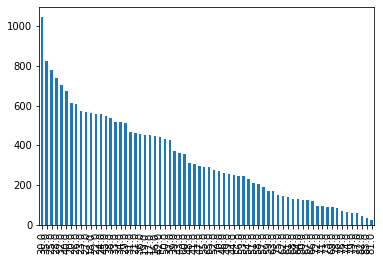

In [447]:
FinancialDataset_df['Respondent Age'].value_counts().plot(kind = 'bar')
  # Chart elements
('Respondent Ages per country', 'Age', 'Country')

Gender of respondent

In [448]:
# Assigning 1 to female and 0 to male in order to analyse this data

# using get dummies function in pandas

dummy = pd.get_dummies(FinancialDataset_df['gender_of_respondent'])


In [449]:
dummy.head(3)

,Female,Male
0,1,0
1,1,0
2,0,1


In [452]:
df2 = pd.concat((FinancialDataset_df, dummy), axis=1)

In [453]:
df2.head(3)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job,Female,Male
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed,1,0
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent,1,0
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,0,1


In [455]:
df2.drop(["gender_of_respondent"], axis=1)
df2.head(2)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job,Female,Male
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed,1,0
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent,1,0


In [456]:
df2 = df2.drop(["Male"], axis=1)
df2.head(2)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job,Female
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed,1
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent,1


In [464]:

df2 = df2.rename(columns = {'Female': 'Gender'}, inplace = False)

df2.head(3)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job,Gender
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed,1
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent,1
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,0


'Gender Representation'

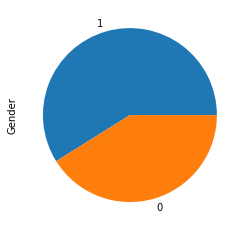

In [465]:
df2['Gender'].value_counts().plot(kind = 'pie')
  # Chart elements
('Gender Representation')

# 1 = Female
# 0 = Males

### Bivariate Analysis

In [466]:

# Checking the columns 

df2.columns

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job', 'Gender'],
      dtype='object')

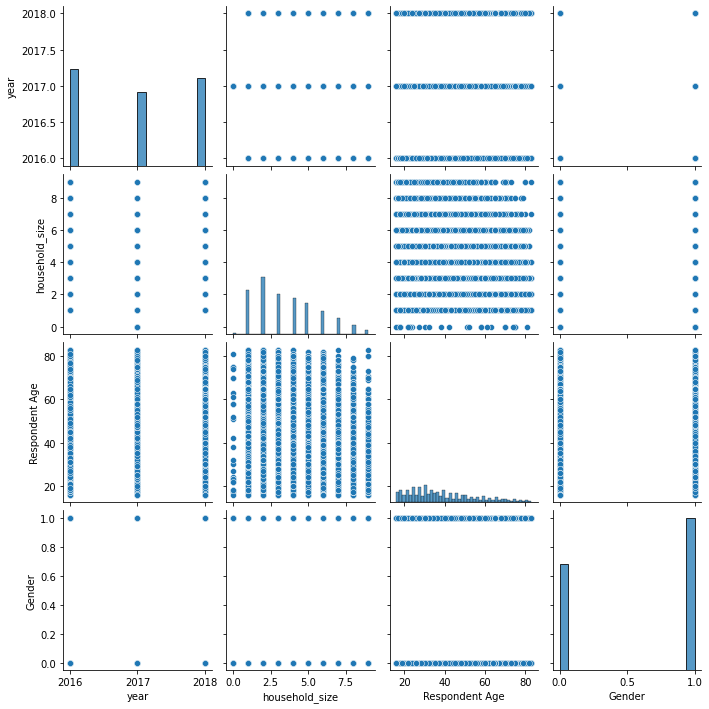

In [467]:
# Ploting the bivariate summaries and recording the observations

sns.pairplot(df2)
plt.show()

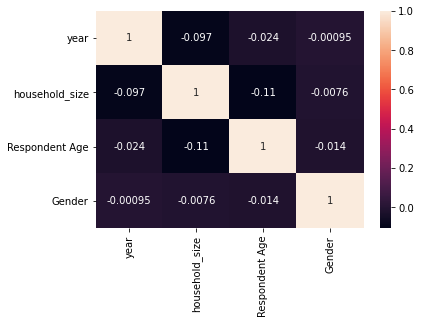

In [468]:
sns.heatmap(df2.corr(),annot=True)
plt.show()